## 기말고사
### 선택한 영화: 해리포터와 마법사의 돌

In [331]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
import time
from konlpy.corpus import kolaw
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
from collections import Counter
from konlpy.tag import Okt
okt = Okt()

point_p = [] #긍정리뷰 포인트
text_p = []  #긍정리뷰 내용
line_p = "" #긍정리뷰 내용 모음집

point_n = [] #부정리뷰 포인트
text_n = []  #부정리뷰 내용
line_n = "" #부정리뷰 내용 모음집

for page in range(1,450): #한페이지당 10개의 리뷰 
    time.sleep(0.01)
    url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=30688&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=" + str(page)
    #주소는 페이지를 넘길때마다 숫자가 넘겨지므로 1페이지부터 449페이지까지
    html = urlopen(url)
    
    soup = BeautifulSoup(html.read(),"html.parser") #데이터 파싱
    
    points = soup.find_all('div', {'class':'star_score'}) #필요한 부분만 뽑아냄
    texts = soup.find_all('div', {'class':'score_reple'})
    
    for p,t in zip(points,texts):
        if int(p.text) == 10 or int(p.text) == 9: #10점, 9점은 긍정리뷰
            point_p.append("pos")
            text_p.append(t.find("p").text.strip()) 
            line_p = line_p + t.find("p").text.strip()
        elif int(p.text)>=1 and int(p.text)<=4: #1점, 2점, 3점, 4점은 부정리뷰
            point_n.append("neg")
            text_n.append(t.find("p").text.strip())
            line_n = line_n + t.find("p").text.strip()

#### 코드 설명
먼저 처음에 쓰는 라이브러리들을 import해준뒤 쓰는 변수를 선언했습니다. 리뷰데이터는 최소 1000개 이상, 5000개 이하이므로 한페이지당 리뷰가 10개를 생각하여 1부터 449페이지로 잡았고 BeautifulSoup를 사용해 html 데이터를 파싱해주었습니다. 이때 url은 page에 따라 다른 부분을 변수로 선언하여 for문을 이용해 페이지에 접근할 수 있도록 하였습니다. find()을 이용하여 파싱된 데이터 중 필요한 부분만 뽑아냈고 반복문을 이용해 제가 사용하고 싶은 부분을 한번더 간추리고, 제가 사용하고 싶은 용도의 데이터로 변형하였습니다. 긍정리뷰는 10점, 9점, 부정리뷰는 1~4점으로 조건문을 이용해 나눠주었는데 이때 points는 안에 text가 제가 원하는 내용밖에 없기 때문에 .text를 이용해 원하는 정보를 사용할 수 있었지만 texts는 안에 여러 내용이 많기 때문에 한번 더 find을 사용하여 제가 사용하고자 하는 부분은 뽑아내어 strip()으로 공백을 제거하였습습니다. 또한 별점을 그대로 넣지 않고 제가 필요한것은 긍정인지 부정인지가 중요했기 때문에 점수를 넣지 않고 긍정에는 pos를 부정에는 neg를 point_p와 poin_n에 각각 넣어주었습니다.

In [333]:
count_po = Counter(line_p.split()) #공백을 제거한 긍정리뷰
stopword_list_p = [] #긍정 리스트
for word in count_po:
    if len(word) == 1: #불용어 처리
        stopword_list_p.append(word)
for stopword in stopword_list_p:
    if stopword in count_po:
        count_po.pop(stopword) #불필요한 단어 제거

count_no = Counter(line_n.split())
stopword_list_n = [] #부정 리스트
for word in count_no:
    if len(word) == 1:
        stopword_list_n.append(word)
for stopword in stopword_list_p:
    if stopword in count_no:
        count_no.pop(stopword)

print("긍정적 평에서 많이 나오는 단어들: ")        
print(count_po.most_common(10)) #가장 많이 나오는 단어 10개
print("부정적 평에서 많이 나오는 단어들: ")  
print(count_no.most_common(10)) #가장 많이 나오는 단어 10개

긍정적 평에서 많이 나오는 단어들: 
[('너무', 204), ('해리포터', 163), ('영화', 163), ('최고의', 147), ('정말', 131), ('진짜', 129), ('봐도', 91), ('가장', 79), ('다시', 77), ('인생', 71)]
부정적 평에서 많이 나오는 단어들: 
[('영화', 36), ('보는', 33), ('가장', 31), ('없는', 31), ('해서', 30), ('반지의', 30), ('봐야지..애들이나', 29), ('만화용', 29), ('영화...이게', 29), ('흥행을', 29)]


#### 데이터 분석
긍정적인 평에서 가장 많이 나온 단어 5개는 많이 나온 순으로 '너무', '해리포터', '영화', '정말', '진짜'이고
긍정적인 평에서 가장 많이 나온 단어 5개는 많이 나온 순으로 '영화', '보는', '가장', '없는', '해서'입니다

#### 코드 설명
split()을 이용하여 공백을 제거한 긍정리뷰(line_p)을 Counter을 이용하여 각 단어의 숫자를 센 것을 변수 count_po에 넣습니다. 그 후 의미없는 단어들을 제거합니다. for문을 이용해 count_po를 돌면서 단어들 중 한글자인 단어들을 stop_list_p에 넣습니다. 그리고 그 단어들을 pop을 이용하여 count_po에서 빼줍니다. 부정리뷰도 같은 작업을 반복합니다. most_common을 이용하여 가장 많이 나오는 단어 10개를 뽑아 print를 이용하여 출력합니다

In [315]:
print("긍정적 리뷰의 개수: " + str(len(point_p)))
print("부정적 리뷰의 개수:" + str(len(point_n)))

긍정적 리뷰의 개수: 3611
부정적 리뷰의 개수:232


#### 데이터 분석
총 리뷰중 긍정리뷰는 3611, 부정리뷰는 232로 해리포터는 대체로 평점이 긍정적임을 알 수 있습니다.
부정리뷰는 약 200건으로 긍정리뷰에 반해 매우 적은것을 확인할수 있습니다.
#### 코드 설명
위에 코드에서 긍정리뷰와 부정리뷰를 정리했기 때문에 각 리뷰의 개수를 확인만 하면 되므로
len을 이용하여 개수를 확인하고 str로 문자열로 형변환을 하여 각 리뷰의 개수를 출력하였습니다

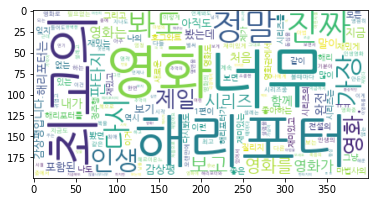

In [329]:
wcp = WordCloud(background_color='white', max_words=2000, font_path=r'C\Windows\Fonts\NanumGothic.ttf')

wcp = wcp.generate_from_frequencies(count_po)
plt.imshow(wcp, interpolation="bilinear")
plt.show()

#### 데이터 분석
긍정 리뷰 워드클라우드를 확인해보았을 때 가장 큰 단어들을 정리하면 '해리포터', '정말', '가장', '최고의', '진짜', '인생', '너무', '다시', '영화' 등으로 리뷰를 쓸 때 감탄사나 부사를 많이 이용한다는 것을 알 수 있었습니다

#### 코드 설명
WorldCloud를 이용해 배경색은 흰색으로 최대 글자수는 2000개 그리고 한국어 사용으로 폰트는 고딕체를 주었습니다. 위쪽에서 빈도를 구했기 때문에 위에서 구한 빈도를 넣어 워드 클라우드를 그렸습니다

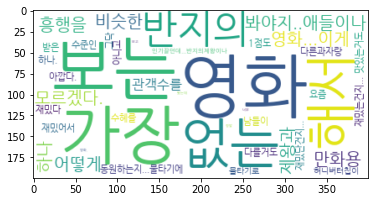

In [317]:
wcn = WordCloud(background_color='white', max_words=2000, font_path=r'C\Windows\Fonts\NanumGothic.ttf')
wcn = wcp.generate_from_frequencies(count_no)

plt.imshow(wcn, interpolation="bilinear")
plt.show()

#### 데이터분석
부정 리뷰 워드클라우드를 확인해보았을 때 가장 큰 단어들을 정리하면 "보는", "영화", "가장", "없는", "해서"이며 영화가 큰 글자로 자리함으로 "영화"는 긍정리뷰와 부정리뷰 둘다 많이 쓰인다는 것을 알 수 있었습니다. 또한 '애들이나', '만화용' 등이 단어도 큰 자리를 차지함으로 해리포터는 어린 아이들도 볼수 전체 관람가 영화이지만 그 점으로 인해 이 영화를 싫어하는 사람이 많다는 것을 알게되었습니다

#### 코드 설명
워드클라운드를 그리는것은 긍정리뷰 워드클라우드 그리기와 똑같습니다 안에 들어가는 데이터만 부정리뷰로 바꾸었습니다.

In [318]:
train = []
for i in range(0,150):
    sent = (text_p[i], point_p[i]) #(내용,긍정)
    train.append(sent)
    sent = (text_n[i], point_n[i]) #(내용,부정)
    train.append(sent)

#### 코드 설명
앞서 골라낸 리뷰를 전부 하면 저의 컴퓨터에서 너무 많은 데이터로 오류가 나기때문에 양을 줄여서 분류기를 학습 시키도록 하였습니다 어느 한쪽이 치우치지 않도록 긍정리뷰, 부정리뷰 각각 150개를 train에 넣어주었습니다 
train에 넣을때 앞에는 리뷰내용을 뒷쪽에는 긍정인지 부정인지를 넣었습니다.

In [319]:
def pos_tokenize(raw_sent): #형태소 분리 함수
    pos_sent = []
    sent = okt.pos(raw_sent, norm=True, stem=True) #형태소 분별
    
    for tup in sent:
        word, tag = tup[0], tup[1] #('좋다', 'Adjective')
        word_tag = word + '/' + tag #'좋다/Adjective'
        pos_sent.append(word_tag)
        
    return ' '.join(pos_sent)

all_words = set()
 
for tup in train: #모든 단어 집합 만들기
    sent, label = tup[0], tup[1]
    sent = pos_tokenize(sent)
    words = word_tokenize(sent)
    for word in words:
        all_words.add(word)

train_features = []

for tup in train: #각 문장을 단어가 있는지 없는지 여부로 표현
    sent, label = tup[0], tup[1]
    sent = pos_tokenize(sent)
    words = word_tokenize(sent)
    tmp = {set_word: (set_word in words) for set_word in all_words} #단어가 있으면 True 없으면 False
    sent_tup = (tmp, label)
    train_features.append(sent_tup)
    
classifier = nltk.NaiveBayesClassifier.train(train_features) #단어별 확률 계산

#### 코드 설명
먼저 pos_tokenize 함수를 만들어 문장을 형태소 단위로 분리해주는 함수를 만들었습니다. okt를 이용하여 형태소를 분별해주었고 for문을 사용해 사용하기 편한 형태로 변형해주었습니다.
그리고 모든 단어 집합을 만들었습니다. train에 있는 문장들의 단어 set 만들고 set()을 이용하여 집합으로 만들어 주었습니다. for문을 이용하여 반복하는데 sent를 pos_tokenize함수를 이용하여 형태소를 분리 한 뒤 word_tokenize을 하여 정리했습니다. 그리고 단어들을 all_words에 add해주었습니다.

그리고 각 문장을 단어가 있는지 없는지 여부로 표현하였습니다. all_words(전체단어)중에 있는 단어는 True로 표시하고 없는 단어는 False로 표시하였습니다. 

그리고 단어별 확률을 계산하여 학습시켰습니다

In [320]:
test_sent = '해리포터는 만화용 영화야'
test_sent= pos_tokenize(test_sent) #형태소 단위로 분리
words = word_tokenize(test_sent) #단어별로 토큰화
test_feature = {set_word: (set_word in words) for set_word in all_words} #있으면 True, 없으면 False
classifier.classify(test_feature) #테스트

'neg'

In [321]:
test_sent = '해리포터는 진짜 재밌어'
test_sent= pos_tokenize(test_sent)
words = word_tokenize(test_sent)
test_feature = {set_word: (set_word in words) for set_word in all_words}
classifier.classify(test_feature)

'pos'

In [322]:
test_sent_on = '해리포터는 다시봐도 짱이야'
test_sent_on = pos_tokenize(test_sent_on)
words = word_tokenize(test_sent_on)
test_feature = {set_word: (set_word in words) for set_word in all_words}
classifier.classify(test_feature)

'pos'

#### 데이터 분석
저는 테스트 문장을 앞서 워드클라우드 만든 것을 이용하여 워드클라우드에서 큰 단어들을 문장으로 만들어 테스트 해보았습니다 '재밌다', '짱이다'라는 긍정적인 단어를 넣은 문장은 'pos'가 부정리뷰 워드클라우드에서 큰 단어중 하나였던 '만화용' 단어를 넣은 문장은 'neg' 인것으로 보아 텍스트 분류는 성공적으로 보입니다. 긍정리뷰 워드클라우드에서 큰 단어였던 '해리포터'가 테스트 문장에 모두 들어가 있는 것으로 보아 긍정리뷰에서 많이 쓰였지만 단어 자체는 긍정과 부정으로 나눌수 없는 단어로 보입니다.

#### 코드 설명
먼저 테스트 할 문장을 만들고 문장을 형태소 단위로 분리해주었습니다. 그리고 단어별로 토큰화 하였습니다.
all_words(전체단어)중에 있는 단어만 체킹해서(문장중 있는 단어는 True, 없는 단어는 False) 테스트 하였습니다